In [4]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
yasserh_breast_cancer_dataset_path = kagglehub.dataset_download('yasserh/breast-cancer-dataset')

print('Data source import complete.')


Data source import complete.


Linear Kernel Accuracy: 0.9035087719298246
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114

RBF Kernel Accuracy: 0.9210526315789473
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.93      0.94      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



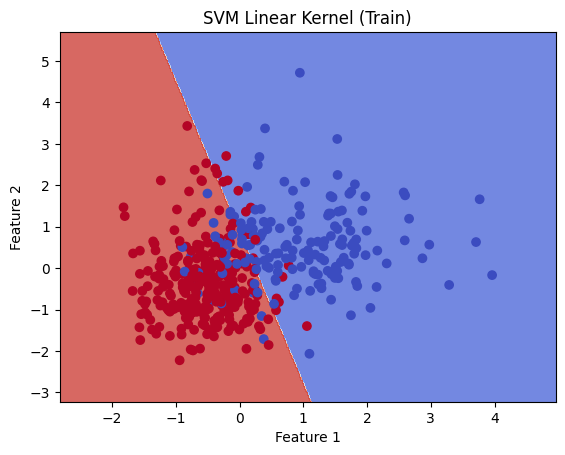

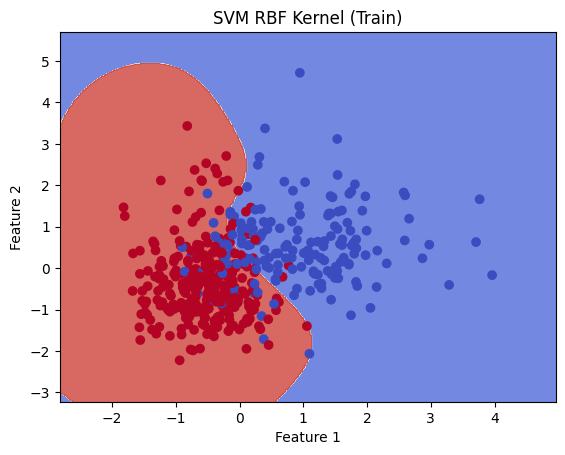

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load breast cancer dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Use 2 features for visualization
X_vis = X[:, :2]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM with linear kernel
clf_linear = SVC(kernel='linear', C=1.0)
clf_linear.fit(X_train, y_train)
y_pred_linear = clf_linear.predict(X_test)

# Train SVM with RBF kernel
clf_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
clf_rbf.fit(X_train, y_train)
y_pred_rbf = clf_rbf.predict(X_test)

# Print evaluation
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

# Decision boundary visualization (RBF)
def plot_boundary(clf, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

plot_boundary(clf_linear, X_train, y_train, "SVM Linear Kernel (Train)")
plot_boundary(clf_rbf, X_train, y_train, "SVM RBF Kernel (Train)")
